The goal of collecting this dataset:
 The dataset on car accidents is collected to enable predictive modeling of traffic incidents. The primary
  objective is to identify patterns and key factors contributing to car accidents, such as collision 
  type, reported location, injury types, and contributing elements. By using this data, predictive 
  models can be developed to classify the likelihood of future accidents, with the aim of 
  improving road safety, optimizing traffic management, and informing policy decisions.

In [102]:
import pandas as pd
##read dataset
data1 = pd.read_csv('/workspaces/IT326/Dataset/monroe county car crach 2003-2015.csv', encoding='ISO-8859-1') 
df = pd.DataFrame(data1) 
print(df.info()) 
print(df.head())
print(df.describe())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB
None
   Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0  2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1  2015      1    6  Weekday  1500.0          2-Ca

Link/Resource of this dataset: https://www.kaggle.com/datasets/jacksondivakarr/car-crash-dataset?resource=download - Car Accidents in USA more specific LA-monroe
Number of Rows: 53943
Number of Columns: 11


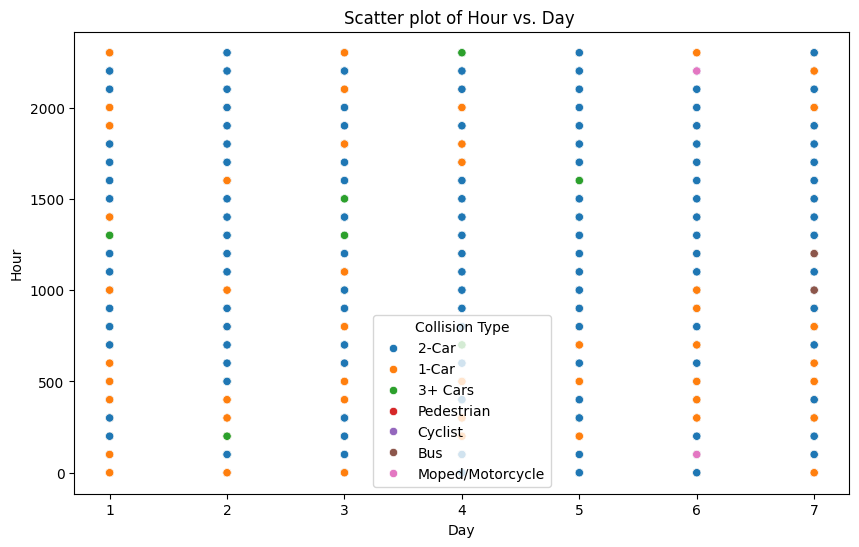

In [103]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
##Scatter plot 
plt.figure(figsize=(10,6))
sns.scatterplot(x= 'Day', y= 'Hour', data = data1, hue = 'Collision Type')
plt.xlabel('Day')
plt.ylabel('Hour')
plt.title('Scatter plot of Hour vs. Day ')
plt.show()


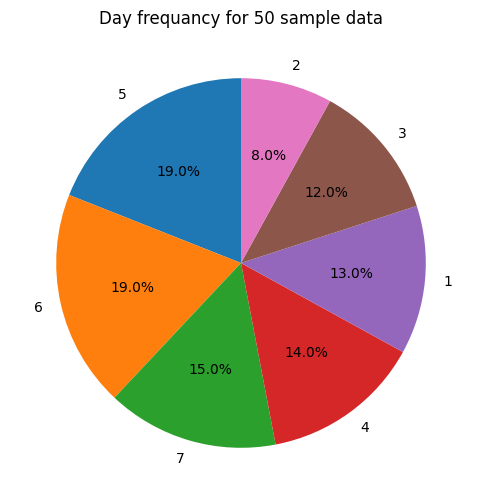

In [104]:

# sample from  dataset
sampled_data = data1.sample(n=100, random_state=1)  

# pie chart for 'Hour' column from the sample
Day_frequancy = sampled_data['Day'].value_counts(normalize=True)*100
Day_frequancy.plot.pie(autopct='%1.1f%%', figsize=(10,6),startangle=90)

plt.ylabel('')
plt.title('Day frequancy for 50 sample data')
plt.show()


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Hour'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>]], dtype=object)

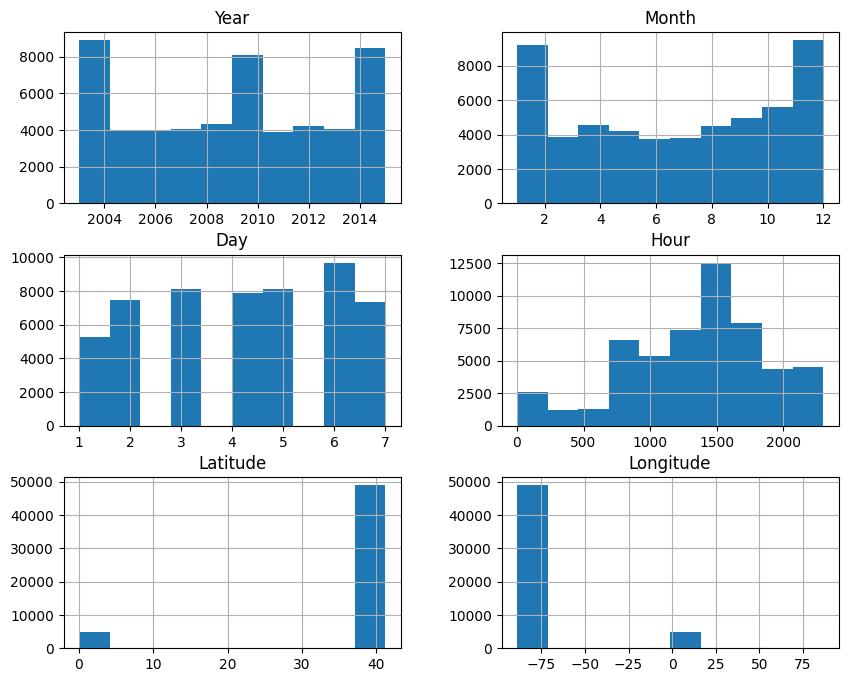

In [105]:
##histogram bar
df.hist(figsize=(10,8))

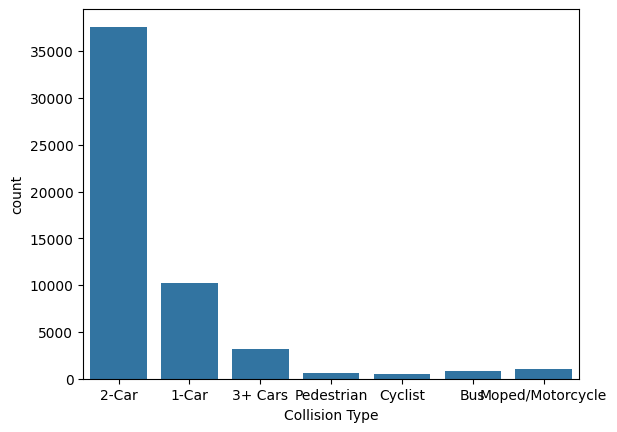

In [106]:
##bar plot
sns.countplot(x= 'Collision Type', data = data1 )
plt.title('')
plt.show()

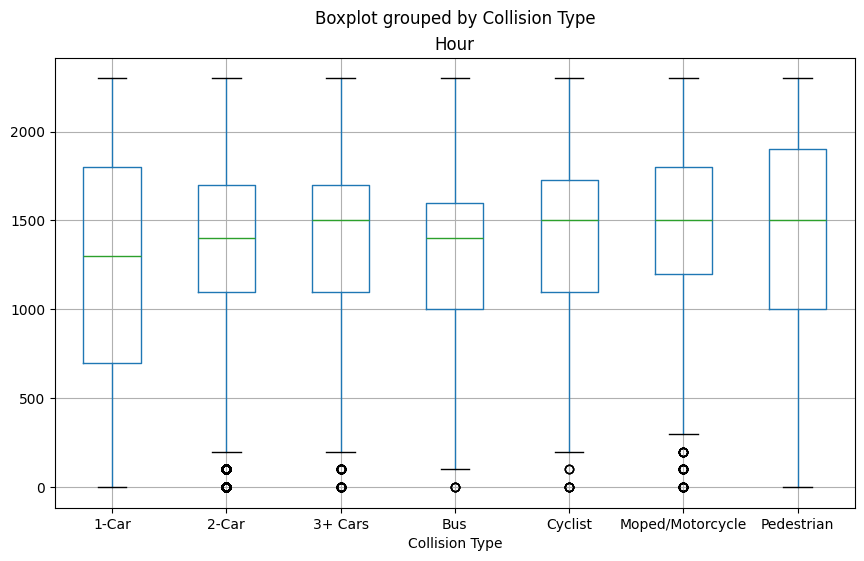

In [107]:
##box plot
data1.boxplot(column='Hour',by='Collision Type', figsize=(10,6))
plt.show()

In [108]:
## number of missing value in entire dataset 
missing_values = data1.isna().sum()
print("missing values in each column\n")
print(missing_values)
print('Total Missing Values In Entire Dataset: ', missing_values.sum())

missing values in each column

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1121
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64
Total Missing Values In Entire Dataset:  1515


In [109]:
## remove rows with missing data
df_clean=df.dropna()

print('dataframe after removing rows with missing data:\n')
print(df_clean)

dataframe after removing rows with missing data:

       Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0      2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1      2015      1    6  Weekday  1500.0          2-Car   No injury/unknown   
2      2015      1    6  Weekend  2300.0          2-Car  Non-incapacitating   
3      2015      1    7  Weekend   900.0          2-Car  Non-incapacitating   
4      2015      1    7  Weekend  1100.0          2-Car   No injury/unknown   
...     ...    ...  ...      ...     ...            ...                 ...   
53938  2003     10    6  Weekday  1700.0          2-Car   No injury/unknown   
53939  2003     11    3  Weekday   800.0          1-Car   No injury/unknown   
53940  2003     12    5  Weekday  1200.0          2-Car   No injury/unknown   
53941  2003     12    1  Weekend   700.0          2-Car   No injury/unknown   
53942  2003     12    7  Weekend  1700.0          2-Car  Non-incapacitating   

 

In [110]:
#detect outliers 


In [111]:
#Central Tendency Measures 
numeric_data = data1.select_dtypes(include='number')

# Calculate Central Tendency
mean_values = numeric_data.mean()
median_values = numeric_data.median()
variance_values = numeric_data.var()
mode_values=numeric_data.mode()

mode_values = data1.mode().iloc[0]

central_tendency= pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Variance': variance_values,
    'Mode':mode_values
})
print(central_tendency)

                          Mean       Median       Variance  \
Collision Type             NaN          NaN            NaN   
Day                   4.196912     4.000000       3.645961   
Hour               1347.265349  1400.000000  282656.017271   
Injury Type                NaN          NaN            NaN   
Latitude             35.582109    39.164430     127.461469   
Longitude           -78.619224   -86.530992     622.881135   
Month                 6.662162     7.000000      12.352624   
Primary Factor             NaN          NaN            NaN   
Reported_Location          NaN          NaN            NaN   
Weekend?                   NaN          NaN            NaN   
Year               2008.968059  2009.000000      14.362277   

                                            Mode  
Collision Type                             2-Car  
Day                                            6  
Hour                                      1700.0  
Injury Type                    No injury/unknown  


In [112]:
from sklearn.preprocessing import MinMaxScaler
## Normalization using MinMax Scaler
cloumn_Normalize =['Hour']
data_Normalize=df[cloumn_Normalize]
#
minmax_scaler=MinMaxScaler()
normalized_data_minmax=minmax_scaler.fit_transform(data_Normalize)

df[cloumn_Normalize]=normalized_data_minmax
print(df)



       Year  Month  Day Weekend?      Hour Collision Type         Injury Type  \
0      2015      1    5  Weekday  0.000000          2-Car   No injury/unknown   
1      2015      1    6  Weekday  0.652174          2-Car   No injury/unknown   
2      2015      1    6  Weekend  1.000000          2-Car  Non-incapacitating   
3      2015      1    7  Weekend  0.391304          2-Car  Non-incapacitating   
4      2015      1    7  Weekend  0.478261          2-Car   No injury/unknown   
...     ...    ...  ...      ...       ...            ...                 ...   
53938  2003     10    6  Weekday  0.739130          2-Car   No injury/unknown   
53939  2003     11    3  Weekday  0.347826          1-Car   No injury/unknown   
53940  2003     12    5  Weekday  0.521739          2-Car   No injury/unknown   
53941  2003     12    1  Weekend  0.304348          2-Car   No injury/unknown   
53942  2003     12    7  Weekend  0.739130          2-Car  Non-incapacitating   

                           